In [1]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('E:\Swarnendu-Me-Proj\customer-churn-prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EXPLORATORY DATA ANALYSIS

In [3]:
data_copy=data.copy()
data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_copy.drop(['customerID'], axis=1, inplace=True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
for col in data_copy.columns:
    print(data_copy[col].value_counts())
    print('\n')


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes       

In [7]:
data_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data_copy.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

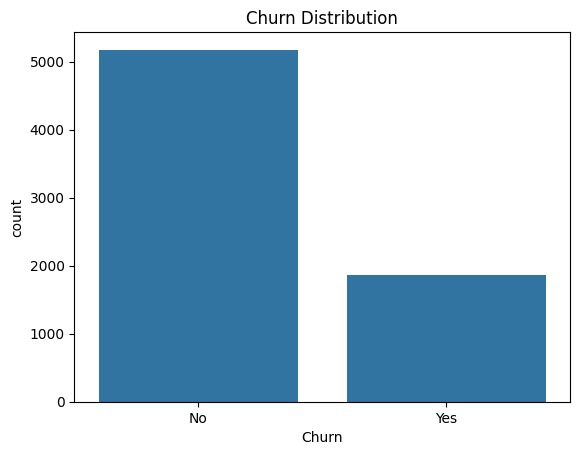

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [12]:
sns.countplot(x='Churn', data=data_copy)
plt.title('Churn Distribution')
plt.show()

churn_rate=data_copy['Churn'].value_counts(normalize=True)*100
churn_rate

In [13]:
data_copy['TotalCharges'] = pd.to_numeric(data_copy['TotalCharges'], errors='coerce')

In [14]:
cat_col=data_copy.select_dtypes(include=['object']).drop(columns=['Churn']).columns
num_col=data_copy.select_dtypes(exclude=['object']).columns

In [15]:
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [16]:
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [17]:
data_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

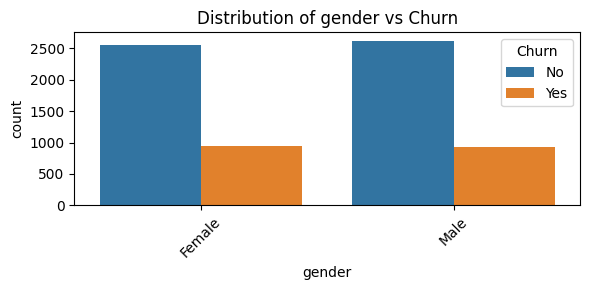

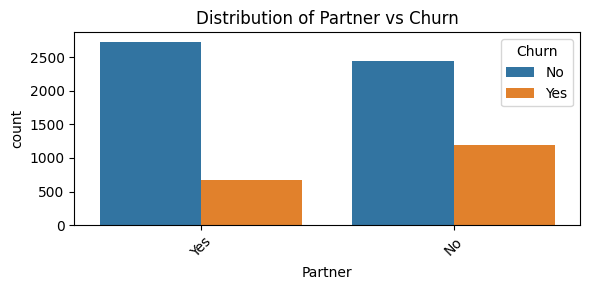

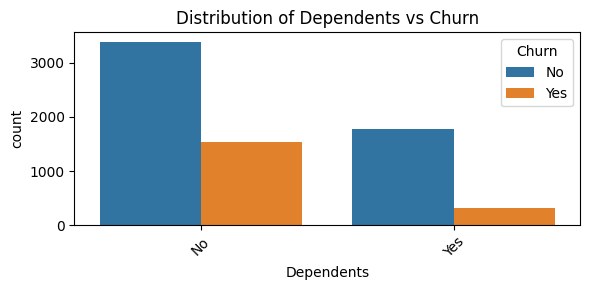

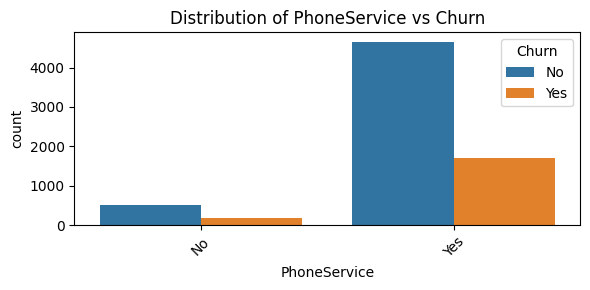

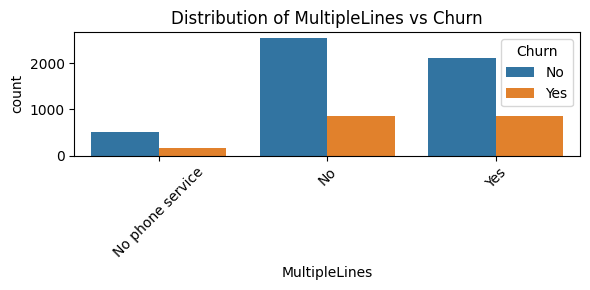

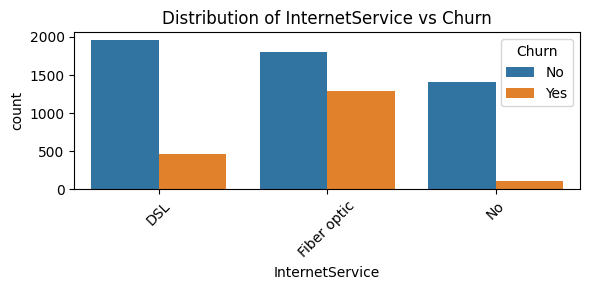

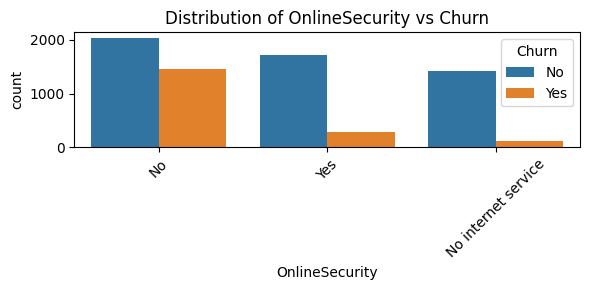

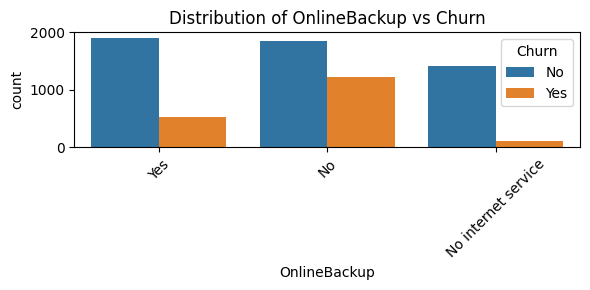

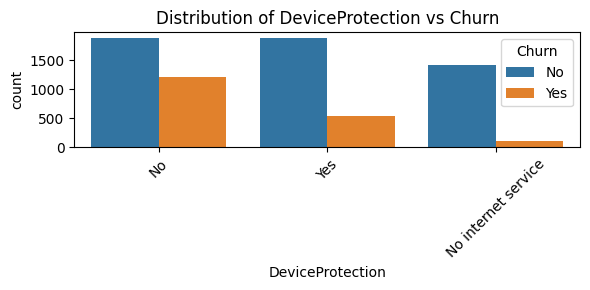

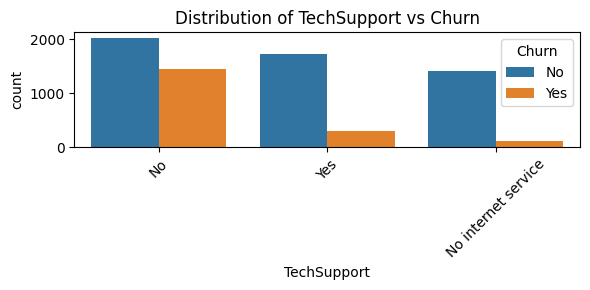

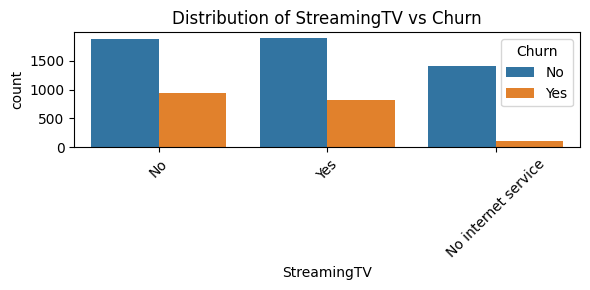

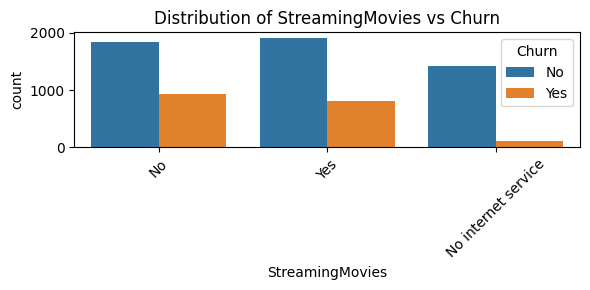

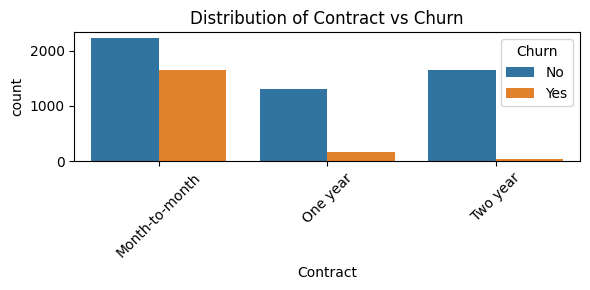

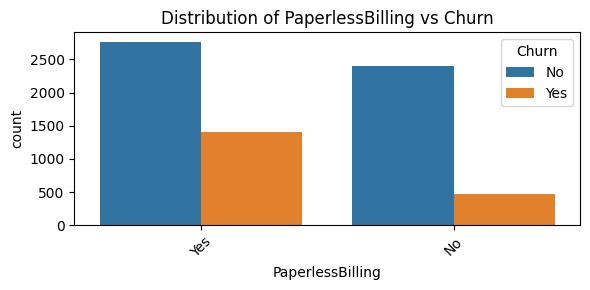

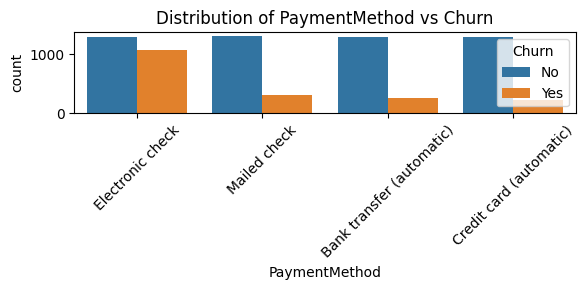

In [18]:
for col in cat_col:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=data_copy, hue='Churn')
    plt.title(f'Distribution of {col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

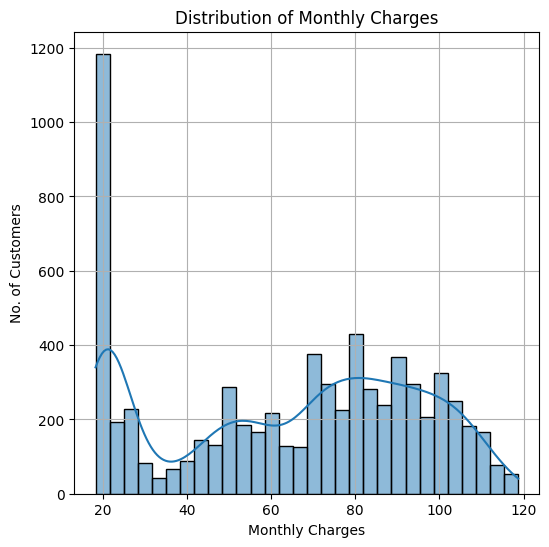

In [19]:
plt.figure(figsize=(6, 6))
sns.histplot(data_copy['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

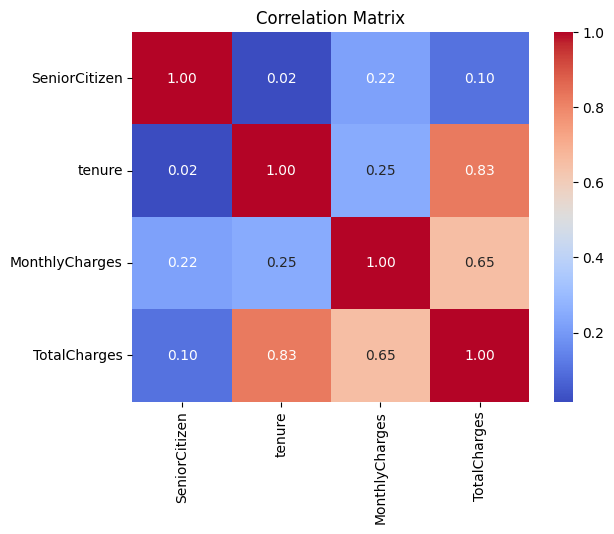

In [20]:
corr=data_copy[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

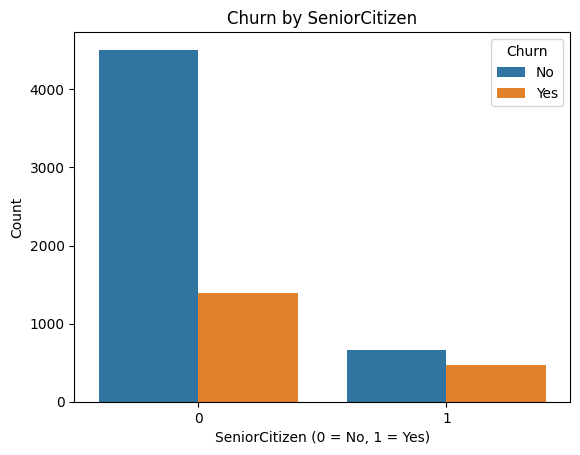

In [21]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data_copy)
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

In [22]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


FEATURE ENGINEERING

In [23]:
#Label Encoding of target column
data_copy['Churn']=data_copy['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\HP\AppData\Local\Temp\ipykernel_4028\3045349848.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy['Churn']=data_copy['Churn'].replace({"Yes": 1, "No": 0})


In [24]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
data_copy['Churn'].value_counts()  

Churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [27]:
#Label Encoding of categorical columns
from sklearn.preprocessing import LabelEncoder
import pickle
encoder={}
label_encoder = LabelEncoder()

for col in cat_col:
    data_copy[col]=label_encoder.fit_transform(data_copy[col])
    encoder[col]=label_encoder

#Saving the encoders
with open('encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)

In [28]:
encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [29]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
X = data_copy.drop('Churn', axis=1)
y = data_copy['Churn']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
y_train.shape, y_test.shape

((5634,), (1409,))

In [45]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    4138
 1    1496
 Name: count, dtype: int64,
 Churn
 0    1036
 1     373
 Name: count, dtype: int64)

INSIGHTS:
    - Imbalanced dataset so applying SMOTE

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer

In [56]:


# Create imputer (mean strategy or use 'median' or 'most_frequent' based on your data)
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

In [62]:
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)
X_test_imputed = imputer.transform(X_test)

In [63]:
y_train_smote.value_counts(), y_test.value_counts()

(Churn
 0    4138
 1    4138
 Name: count, dtype: int64,
 Churn
 0    1036
 1     373
 Name: count, dtype: int64)

MODEL SELECTION AND TRAINING

In [64]:
models={
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

In [65]:
cv_scores={}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores=cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name]=scores
    print(f"{model_name} Cross-Validation Scores: {np.mean(scores):.2f}")
    print("-"*70)

Training Logistic Regression with default parameters...


e:\Swarnendu-Me-Proj\customer-churn-prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Swarnendu-Me-Proj\customer-churn-prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression Cross-Validation Scores: 0.76
----------------------------------------------------------------------
Training Decision Tree with default parameters...
Decision Tree Cross-Validation Scores: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Scores: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Scores: 0.83
----------------------------------------------------------------------
Training AdaBoost with default parameters...
AdaBoost Cross-Validation Scores: 0.83
----------------------------------------------------------------------


In [67]:
#Evaluating all the models
print("Evaluating all the models before hyperparameter tuning")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_smote, y_train_smote) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_imputed)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_smote, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_smote, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_smote, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_smote, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_smote, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Evaluating all the models before hyperparameter tuning


e:\Swarnendu-Me-Proj\customer-churn-prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7664
- F1 score: 0.7658
- Precision: 0.7423
- Recall: 0.8163
- Roc Auc Score: 0.7664
----------------------------------
Model performance for Test set
- Accuracy: 0.7516
- F1 score: 0.7653
- Precision: 0.5192
- Recall: 0.8338
- Roc Auc Score: 0.7779


Decision Tree
Model performance for Training set
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 0.9995
- Recall: 0.9986
- Roc Auc Score: 0.9990
----------------------------------
Model performance for Test set
- Accuracy: 0.7395
- F1 score: 0.7383
- Precision: 0.5083
- Recall: 0.4933
- Roc Auc Score: 0.6607


Random Forest
Model performance for Training set
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 0.9986
- Recall: 0.9995
- Roc Auc Score: 0.9990
----------------------------------
Model performance for Test set
- Accuracy: 0.7935
- F1 score: 0.7863
- Precision: 0.6349
- Recall: 0.5174
- Roc Auc Score: 0.7051


XGBoost
Model performance for Training set
- Accu

In [68]:
log_params={
    'C':[0.01, 0.1, 1, 10, 100], 
    'penalty':['l1', 'l2'], 
    'solver':['liblinear', 'saga'], 
    'max_iter':[100, 300, 500]
}

ada_params={"n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2], 
            "algorithm": ["SAMME"],
            "estimator": [
                DecisionTreeClassifier(max_depth=1),
                DecisionTreeClassifier(max_depth=2),
                DecisionTreeClassifier(max_depth=3)]
}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

from sklearn.model_selection import RandomizedSearchCV

randomcv_models = [
                ("Logistic Regression",  LogisticRegression(random_state=42), log_params),
                ("AdaBoost", AdaBoostClassifier(random_state=42), ada_params),
                ("Xgboost", XGBClassifier(random_state=42), xgboost_params)    
]

In [69]:
randomcv_models

[('Logistic Regression',
  LogisticRegression(random_state=42),
  {'C': [0.01, 0.1, 1, 10, 100],
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga'],
   'max_iter': [100, 300, 500]}),
 ('AdaBoost',
  AdaBoostClassifier(random_state=42),
  {'n_estimators': [50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.2],
   'algorithm': ['SAMME'],
   'estimator': [DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3)]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
    

In [79]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=3,
                                   n_jobs=-1)
    random.fit(X_train_smote, y_train_smote)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

e:\Swarnendu-Me-Proj\customer-churn-prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


e:\Swarnendu-Me-Proj\customer-churn-prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Logistic Regression -------------------
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 100}
---------------- Best Params for AdaBoost -------------------
{'n_estimators': 100, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2), 'algorithm': 'SAMME'}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.4}


In [80]:
models={
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', max_iter=100, C=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=2), algorithm="SAMME"),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, colsample_bytree=0.4)
}

In [81]:
#Evaluating all the models
print("Evaluating all the models after hyperparameter tuning")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_smote, y_train_smote) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_imputed)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_smote, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_smote, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_smote, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_smote, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_smote, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Evaluating all the models after hyperparameter tuning


Logistic Regression
Model performance for Training set
- Accuracy: 0.7688
- F1 score: 0.7684
- Precision: 0.7468
- Recall: 0.8134
- Roc Auc Score: 0.7688
----------------------------------
Model performance for Test set
- Accuracy: 0.7615
- F1 score: 0.7744
- Precision: 0.5315
- Recall: 0.8365
- Roc Auc Score: 0.7855


AdaBoost
Model performance for Training set
- Accuracy: 0.8478
- F1 score: 0.8477
- Precision: 0.8443
- Recall: 0.8528
- Roc Auc Score: 0.8478
----------------------------------
Model performance for Test set
- Accuracy: 0.7963
- F1 score: 0.8000
- Precision: 0.6024
- Recall: 0.6783
- Roc Auc Score: 0.7585


XGBoost
Model performance for Training set
- Accuracy: 0.8612
- F1 score: 0.8612
- Precision: 0.8551
- Recall: 0.8697
- Roc Auc Score: 0.8612
----------------------------------
Model performance for Test set
- Accuracy: 0.8055
- F1 score: 0.8086
- Precision: 0.6199
- Recall: 0.6863
- Roc Auc Score: 0.7674




In [82]:
gridcv_models = [
                ("Logistic Regression",  LogisticRegression(random_state=42), log_params),
                ("AdaBoost", AdaBoostClassifier(random_state=42), ada_params),
                ("Xgboost", XGBClassifier(random_state=42), xgboost_params)    
]

In [85]:
#Using GridsearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

model_param_grid = {}

for name, model, params in gridcv_models:
    grid = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=3,
                        verbose=3,
                        n_jobs=-1)
    
    grid.fit(X_train_smote, y_train_smote)
    model_param_grid[name] = grid.best_params_

# Display best params
for model_name in model_param_grid:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param_grid[model_name])


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 150 candidates, totalling 450 fits
---------------- Best Params for Logistic Regression -------------------
{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
---------------- Best Params for AdaBoost -------------------
{'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.2, 'n_estimators': 100}
---------------- Best Params for Xgboost -------------------
{'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [90]:
models_grid={
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', max_iter=100, C=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=2), algorithm="SAMME"),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, colsample_bytree=0.4)
}

In [91]:
#Evaluating all the models
print("Evaluating all the models after hyperparameter tuning")
for i in range(len(list(models_grid))):
    model = list(models_grid.values())[i]
    model.fit(X_train_smote, y_train_smote) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_imputed)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_smote, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_smote, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_smote, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_smote, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_smote, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models_grid.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Evaluating all the models after hyperparameter tuning
Logistic Regression
Model performance for Training set
- Accuracy: 0.7688
- F1 score: 0.7684
- Precision: 0.7468
- Recall: 0.8134
- Roc Auc Score: 0.7688
----------------------------------
Model performance for Test set
- Accuracy: 0.7615
- F1 score: 0.7744
- Precision: 0.5315
- Recall: 0.8365
- Roc Auc Score: 0.7855


AdaBoost
Model performance for Training set
- Accuracy: 0.8478
- F1 score: 0.8477
- Precision: 0.8443
- Recall: 0.8528
- Roc Auc Score: 0.8478
----------------------------------
Model performance for Test set
- Accuracy: 0.7963
- F1 score: 0.8000
- Precision: 0.6024
- Recall: 0.6783
- Roc Auc Score: 0.7585


XGBoost
Model performance for Training set
- Accuracy: 0.8612
- F1 score: 0.8612
- Precision: 0.8551
- Recall: 0.8697
- Roc Auc Score: 0.8612
----------------------------------
Model performance for Test set
- Accuracy: 0.8055
- F1 score: 0.8086
- Precision: 0.6199
- Recall: 0.6863
- Roc Auc Score: 0.7674


